# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic_num = titanic.select_dtypes(include=['int64', 'float64'])

In [5]:
#your code here- categorical variable
titanic_cat = titanic.select_dtypes(include=['object'])

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here


#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0, 0.5, 'People')

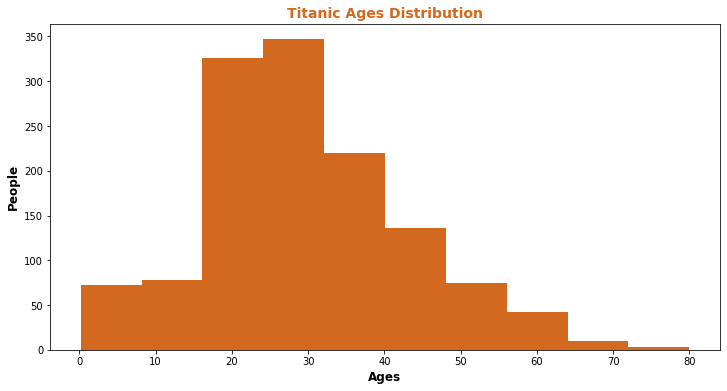

In [7]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.hist(titanic_num['Age'], color='chocolate', rwidth=8.0)
ax.set_title('Titanic Ages Distribution', fontsize=14, fontweight='bold', c='chocolate')
ax.set_xlabel('Ages', fontweight='bold', fontsize=12)
ax.set_ylabel('People', fontweight='bold', fontsize=12)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

In [8]:
# your code here
def age_bins(age):
    if age <= 10:
        return 10
    elif (age > 10) & (age <= 20):
        return 20
    elif (age > 20) & (age <= 50):
        return 50

titanic_num['Age_bins'] = titanic_num['Age'].apply(age_bins)

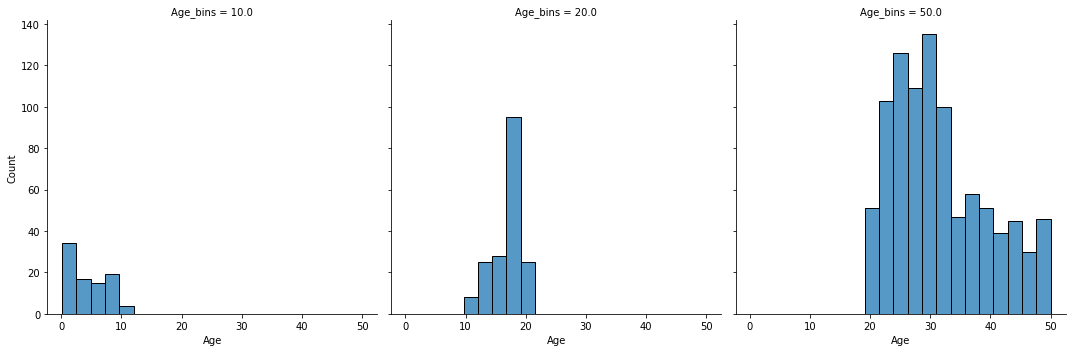

In [9]:
sns.displot(titanic_num, x='Age', col='Age_bins')

#### Whether the bin size affects your plot? Why?

El último bin es el que más personas alberga, al ser también el que más años alberga. Los otros dos comprenden solo rangos de 10 años, y de edades tempranas, mientras que este último alberga 30 años. Ante estos rangos casi siempre será muy probable que la distribución esté descompensada hacia el rango de edades mayores de 20.

#### Use seaborn to show the distribution of the column `Age`

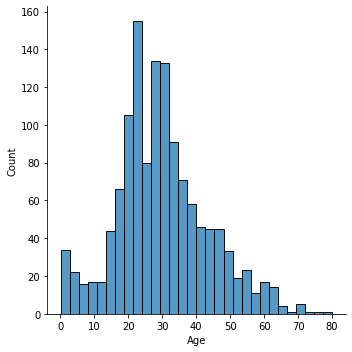

In [10]:
# your code here
sns.displot(titanic_num, x='Age')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

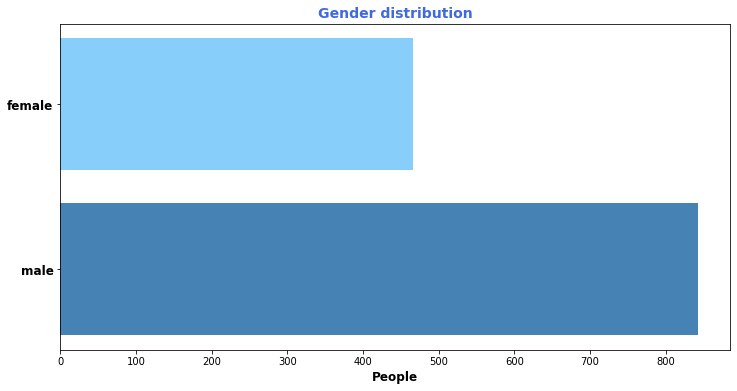

In [11]:
# your code here- 1st way
df = titanic_cat['Gender'].value_counts().rename_axis('genders').reset_index(name='counts')

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.barh(df['genders'], df['counts'], color=['steelblue', 'lightskyblue'])
ax.set_title('Gender distribution', fontsize=14, fontweight='bold', c='royalblue')
ax.set_xlabel('People', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

(array([0, 1]), [Text(0, 0, 'male'), Text(0, 1, 'female')])

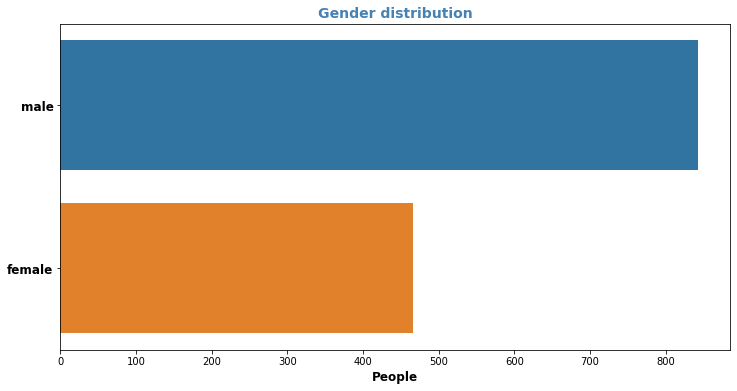

In [12]:
# your code here- 2nd way
f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x="counts", y="genders", data=df)
ax.set_title('Gender distribution', fontsize=14, fontweight='bold', c='steelblue')
ax.set_xlabel('People', fontweight='bold', fontsize=12)
ax.set_ylabel('')
plt.yticks(fontweight='bold', fontsize=12)

#### Use the appropriate plot to visualize the column `Pclass` 


(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

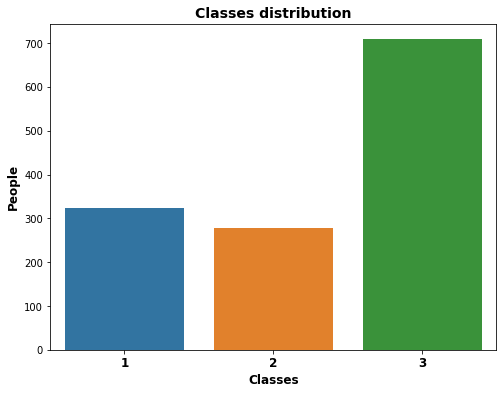

In [13]:
# your code here
df = titanic_num['Pclass'].value_counts().rename_axis('class').reset_index(name='counts')

f, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='class', y='counts', data=df)
ax.set_title('Classes distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Classes', fontweight='bold', fontsize=12)
ax.set_ylabel('People', fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold', fontsize=12)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

Text(0, 0.5, 'Age')

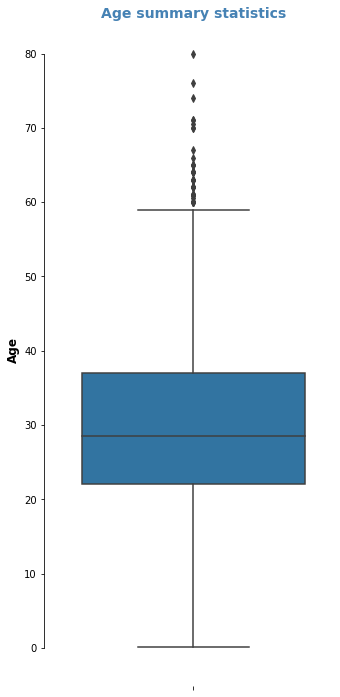

In [14]:
# your code here

f, ax = plt.subplots(figsize=(5, 12))
ax.set_title('Age summary statistics', fontsize=14, fontweight='bold', c='steelblue')
sns.boxplot(y="Age", data=titanic_num)
sns.despine(offset=10, trim=True)
ax.set_ylabel('Age', fontweight='bold', fontsize=12)

#### What does the previous plot tell you about the feature `Age`? Comment.

El rango de era bastante amplio, comprendiendo desde los 0 hasta los 80 años. La mayoría de los pasajeros del Titanic tenía entre 22 y 37 años. A partir de los 60 años, según la edad aumenta el número de gente desciende (hay varios outliers comprendidos entre los 60 y los 80)

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

Text(0.5, 1.0, 'Ages distribution (Pie)')

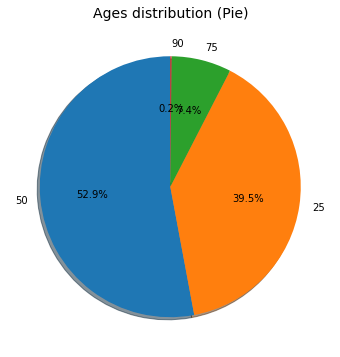

In [32]:
#your code here
def age_bins(age):
    if age <= 25:
        return 25
    elif (age > 25) & (age <= 50):
        return 50
    elif (age > 50) & (age <= 75):
        return 75
    else:
        return 90

titanic_num['Age_bins_my'] = titanic_num['Age'].apply(age_bins)
df = titanic_num['Age_bins_my'].value_counts().rename_axis('age').reset_index(name='counts')

f, ax = plt.subplots(figsize=(8, 6))
ax.pie(df['counts'], labels=df['age'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title("Ages distribution (Pie)", fontsize=14)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Poco más de la mitad de los pasajeros del titanic tenían entre 25 y 50 años; y un 40% tenía 25 o menos. Menos del 10% era mayor de 75.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

Text(0, 0.5, 'Fare')

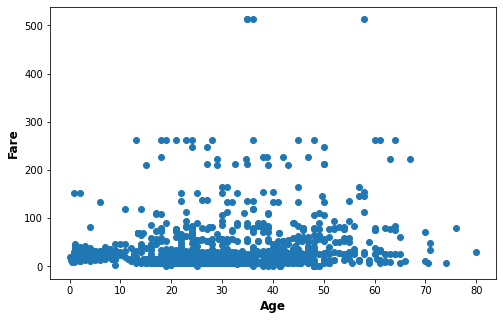

In [38]:
#your code-1st way
f, ax = plt.subplots(1,1, figsize=(8, 5))

ax.scatter(titanic_num['Age'], titanic_num['Fare'])
ax.set_xlabel('Age', fontweight='bold', fontsize=12)
ax.set_ylabel('Fare', fontweight='bold', fontsize=12)

Text(0.5, 0, 'Age')

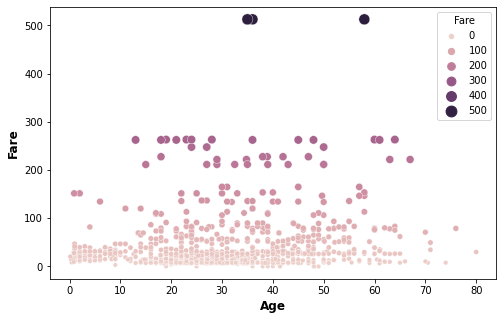

In [37]:
# your code-2nd way
f, ax = plt.subplots(1,1, figsize=(8, 5))

scpl = sns.scatterplot(data=titanic_num, x='Age', y='Fare', hue='Fare', size='Fare', sizes=(20, 120))
scpl.set_ylabel('Fare', fontweight='bold', fontsize=12)
scpl.set_xlabel('Age', fontweight='bold', fontsize=12)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [19]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [20]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [21]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [22]:
#your code here
